In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
import pmdarima
from pmdarima import auto_arima
from math import sqrt
from sklearn.metrics import mean_squared_error
from composition_stats import ilr,ilr_inv

In [3]:
import os 
  
# current directory 
current_dir = os.getcwd() 
relative_path=os.path.abspath(os.path.join(current_dir, os.pardir))

In [4]:
ILR_data = pd.DataFrame(pd.read_csv(
    relative_path+"\\age_structure_data\\ILR_data.csv"))

In [5]:
test_data= pd.DataFrame(pd.read_csv(
    relative_path+"\\age_structure_data\\df_test.csv"))
test_data['Year'] = pd.to_datetime(test_data['Year'])
test_data = test_data.set_index("Year")

In [6]:
ILR_data['Year'] = pd.to_datetime(ILR_data['Year'])
ILR_data =ILR_data.set_index("Year")

In [7]:
Transfomed_ILR_1=ILR_data['log_ratio_1']
Transfomed_ILR_2=ILR_data['log_ratio_2']

In [8]:
def calculate_rmse_for_cv(train_data, test_data, a, b, c):
    arima_model = ARIMA(train_data, order=(a, b, c)).fit()
    prediction = arima_model.predict(
        start=len(train_data), end=len(train_data)+len(test_data)-1)
    rmse = sqrt(mean_squared_error(test_data, prediction))
    return rmse, test_data, prediction

For Transfomed_ILR_1

In [9]:
auto_arima(Transfomed_ILR_1, start_p=0, d=2 ,start_q=0,
           max_p=10, max_q=10, m=1, trace=True, stepwise=True, seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-346.726, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-345.748, Time=0.18 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-346.265, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-348.287, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-344.194, Time=0.19 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.593 seconds


ARIMA(order=(0, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [10]:
train_1_1, test_1_1 = train_test_split(Transfomed_ILR_1, test_size=0.2, shuffle=False)
train_1_2, test_1_2 = train_test_split(train_1_1, test_size=0.2, shuffle=False)
train_1_3, test_1_3 = train_test_split(train_1_2, test_size=0.2, shuffle=False)
rmse1_1, test_data1_1, prediction_test1_1=calculate_rmse_for_cv(train_1_1, test_1_1,0,2,0)
rmse1_2, test_data1_2, prediction_test1_2=calculate_rmse_for_cv(train_1_2, test_1_2,0,2,0)
rmse1_3, test_data1_3, prediction_test1_3=calculate_rmse_for_cv(train_1_3, test_1_3,0,2,0)
average_rmse_1=(rmse1_1+rmse1_2+rmse1_3)/3
average_rmse_1

0.03124717615307973

In [11]:
arima_model_1 = ARIMA(Transfomed_ILR_1, order=(0, 2, 0)).fit()
prediction_1 = arima_model_1.predict(
    start=len(Transfomed_ILR_1), end=len(Transfomed_ILR_1)+len(test_data)-1)
prediction_1 = prediction_1.to_frame()
prediction_1.rename(columns = {'predicted_mean':0}, inplace = True)
final_1 = pd.concat([Transfomed_ILR_1, prediction_1])

For Transfomed_ILR_2

In [12]:
auto_arima(Transfomed_ILR_2, start_p=0, d=2 ,start_q=0,
           max_p=10, max_d=2, max_q=10, m=1, trace=True, stepwise=True, seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-392.126, Time=0.16 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-394.912, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-392.358, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-391.838, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-392.650, Time=0.26 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-391.701, Time=0.27 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-395.444, Time=0.12 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-393.143, Time=0.11 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-392.075, Time=0.15 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-392.366, Time=0.12 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-385.838, Time=0.08 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.735 seconds


ARIMA(order=(1, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [13]:
train_2_1, test_2_1 = train_test_split(Transfomed_ILR_2, test_size=0.2, shuffle=False)
train_2_2, test_2_2 = train_test_split(train_2_1, test_size=0.2, shuffle=False)
train_2_3, test_2_3 = train_test_split(train_2_2, test_size=0.2, shuffle=False)
rmse2_1, test_data2_1, prediction_test2_1=calculate_rmse_for_cv(train_2_1, test_2_1, 1, 2, 0)
rmse2_2, test_data2_2, prediction_test2_2=calculate_rmse_for_cv(train_2_2, test_2_2, 1, 2, 0)
rmse2_3, test_data2_3, prediction_test2_3=calculate_rmse_for_cv(train_2_3, test_2_3, 1, 2, 0)
 
average_rmse_2=(rmse2_1+rmse2_2+rmse2_3)/3
average_rmse_2

0.020759945316900525

In [14]:
arima_model_2 = ARIMA(Transfomed_ILR_2, order=(1, 2, 0)).fit()
prediction_2 = arima_model_2.predict(
    start=len(Transfomed_ILR_2), end=len(Transfomed_ILR_2)+len(test_data)-1)
prediction_2 = prediction_2.to_frame()
prediction_2.rename(columns = {'predicted_mean':0}, inplace = True)
final_2 = pd.concat([Transfomed_ILR_2, prediction_2])

Combine part

In [15]:
final_1.rename(columns = {0:'log_ratio1'}, inplace = True)
final_2.rename(columns = {0:'log_ratio2'}, inplace = True)
final = pd.concat([final_1, final_2], axis=1)
proportion=ilr_inv(final)

In [16]:
def set_col(df):
    df = pd.DataFrame(df, columns=[
    'elder', 'youth', 'kid'])
    df['Year'] = df.index + 1964
    df['Year'] = pd.to_datetime(df['Year'], format='%Y')
    df = df.set_index("Year")
    return df

In [17]:
proportion = set_col(proportion)

In [18]:
df_actual=proportion[(proportion.index< '2010-01-01')]
df_forecast=proportion[(proportion.index> '2009-01-01')]

In [19]:
actual_test1 = pd.concat([test_data1_1, test_data2_1], axis=1)
actual_test2 = pd.concat([test_data1_2, test_data2_2], axis=1)
actual_test3 = pd.concat([test_data1_3, test_data2_3], axis=1)
forecast_test1 = pd.concat([prediction_test1_1, prediction_test2_1], axis=1)
forecast_test2 = pd.concat([prediction_test1_2, prediction_test2_2], axis=1)
forecast_test3 = pd.concat([prediction_test1_3, prediction_test2_3], axis=1)
proportion_actual_1=ilr_inv(actual_test1)
proportion_actual_2=ilr_inv(actual_test2)
proportion_actual_3=ilr_inv(actual_test3)
proportion_forecast_1=ilr_inv(forecast_test1)
proportion_forecast_2=ilr_inv(forecast_test2)
proportion_forecast_3=ilr_inv(forecast_test3)

In [20]:
rmse1 = sqrt(mean_squared_error(proportion_actual_1, proportion_forecast_1))
rmse2 = sqrt(mean_squared_error(proportion_actual_2, proportion_forecast_2))
rmse3 = sqrt(mean_squared_error(proportion_actual_3, proportion_forecast_3))

rmse_cv=(rmse1+rmse2+rmse3)/3
rmse_cv

0.0025881320692032646

In [21]:
rmse_final = sqrt(mean_squared_error(df_forecast, test_data))
rmse_final

0.007979771702392047

In [22]:
df_forecast.to_csv(relative_path+"\\age_structure_data\\auto_ILR_forecast.csv")

<function matplotlib.pyplot.show(close=None, block=None)>

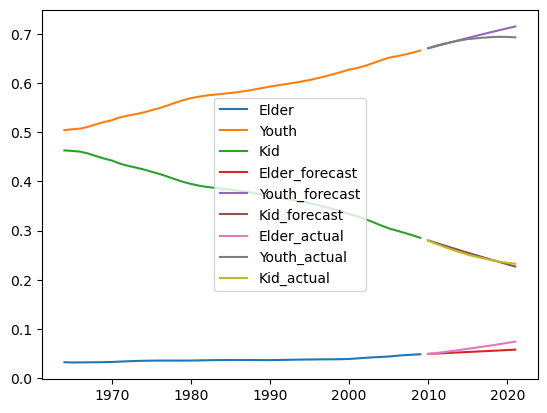

In [23]:

plt.plot(df_actual['elder'],label="Elder")
plt.plot(df_actual['youth'],label="Youth")
plt.plot(df_actual['kid'],label="Kid")
plt.plot(df_forecast['elder'],label="Elder_forecast")
plt.plot(df_forecast['youth'],label="Youth_forecast")
plt.plot(df_forecast['kid'],label="Kid_forecast")

plt.plot(test_data['elder'],label="Elder_actual")
plt.plot(test_data['youth'],label="Youth_actual")
plt.plot(test_data['kid'],label="Kid_actual")



plt.legend(loc='best')
plt.show